In [141]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import matplotlib.pyplot as plt
import re
import time

import seaborn as sns
from IPython.display import display, HTML
from scipy import stats

In [47]:
def get_page(url):
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    page = requests.get(url, headers=headers, timeout=5)
    soup = BS(page.content, 'html.parser').html
    return soup

In [29]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 700)
df = pd.read_csv('Master_Table.csv', sep='\t')
skewed_df = pd.read_csv('skewed.csv', sep='\t')

In [39]:
result_df = pd.merge(df, skewed_df, how='inner', on='movie_id')

In [40]:
display(result_df)

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,Unnamed: 0,Unnamed: 0.1,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness,binned
0,tt0437086,Alita: Battle Angel,74,53,Rated PG-13 for sequences of sci-fi violence a...,None,Moderate,Mild,Mild,Moderate,92,92,1672,908,1618,3179,7776,19778,42536,48089,24879,25110,6.710533,7.714301,8.745297,-0.013382,0.0
1,tt0448115,Shazam!,71,71,"Rated PG-13 for intense sequences of action, l...",None,Moderate,Mild,Mild,Moderate,58,58,3139,1385,2246,4321,11298,29274,58042,48392,18748,19169,6.409151,7.298456,8.270902,-0.044657,0.0
2,tt0451279,Wonder Woman,74,76,Rated PG-13 for sequences of violence and acti...,Mild,Moderate,Mild,Mild,Mild,10,10,9711,3940,5867,10413,23277,54789,115553,133531,76648,75557,6.667235,7.732852,8.824646,-0.012133,0.0
3,tt0460890,The Only Living Boy in New York,63,33,Rated R for language and some drug material,Moderate,None,Moderate,Moderate,None,473,473,206,138,244,477,1131,2147,2556,1490,538,594,5.585817,6.663341,7.662248,0.037861,0.0
4,tt0491175,Suburbicon,57,42,"Rated R for violence, language and some sexuality",Mild,Moderate,Moderate,Mild,Moderate,361,361,1709,1031,1713,3326,6470,8841,6581,2794,850,996,4.623454,5.828752,6.901649,0.058117,0.1
5,tt0491203,Tulip Fever,62,38,Rated R for sexual content and nudity,Severe,Mild,Mild,Mild,Mild,407,407,305,220,461,938,2167,4380,4302,2027,673,830,5.492963,6.427055,7.373140,-0.006379,0.0
6,tt0493405,CHIPS,60,28,"Rated R for crude sexual content, graphic nudi...",Moderate,Severe,Severe,Mild,Mild,271,271,1289,922,1271,2394,5352,10801,9216,4259,1342,2142,5.223281,6.265300,7.282552,0.012027,0.0
7,tt0498381,Rings,45,25,"Rated PG-13 for violence/terror, thematic elem...",Mild,Moderate,Mild,Mild,Moderate,230,230,2840,2965,4323,6271,7785,5532,2742,1162,438,1297,3.201770,4.664226,5.921593,0.075406,0.1
8,tt0837563,Pet Sematary,58,57,"Rated R for horror violence, bloody images, an...",Mild,Severe,Moderate,Mild,Severe,135,135,1969,1516,2847,5765,12029,17215,12239,5253,1502,2329,4.796700,5.918588,6.962211,0.036142,0.0
9,tt0859635,Super Troopers 2,61,41,Rated R for crude sexual content and language ...,Severe,Moderate,Severe,Moderate,Mild,215,215,707,525,829,1483,3041,4949,4704,2568,984,1847,5.113367,6.355425,7.497821,0.041797,0.1


In [117]:
def parse_box_office(movie_id):
    url = "https://www.imdb.com/title/" + movie_id + "/?ref_=tt_rt"
    soup = get_page(url)
    pattern = re.compile(r'Gross USA:')
    try:
        # <h4 class="inline">Gross USA:</h4>
        grossTag = soup.find('h4', class_='inline', text=pattern)
        gross = grossTag.next_sibling
        gross = gross.strip()
        gross = gross.replace('$', '')
        gross = gross.replace(',', '')
        gross = float(gross)
    except:
        gross = -1
    # gross = parent.text
    print(f"gross: {gross}")
    return gross
    

In [118]:
def add_box_office(movie_arr):
    counter = 0
    box_office_movie = {}
    for movie_id in movie_arr:
        print(f"movie_id: {movie_id}")
        box_off = parse_box_office(movie_id)
        box_office_movie[movie_id] = box_off
        time.sleep(1)
        counter += 1
        #if counter >= 3:
        #    break
    
    return box_office_movie
    
def box_office_for_series(series):
    if series['movie_id'] in box_office:
        bo = box_office[series['movie_id']]
    else:
        bo = -1
    return bo



In [119]:
box_office = add_box_office(result_df['movie_id'].to_numpy())

movie_id: tt0437086
gross: 85710210.0
movie_id: tt0448115
gross: 140371656.0
movie_id: tt0451279
gross: 412563408.0
movie_id: tt0460890
gross: 624332.0
movie_id: tt0491175
gross: 5775178.0
movie_id: tt0491203
gross: 2455635.0
movie_id: tt0493405
gross: 18600152.0
movie_id: tt0498381
gross: 27793018.0
movie_id: tt0837563
gross: 54724696.0
movie_id: tt0859635
gross: 30617396.0
movie_id: tt0974015
gross: 229024295.0
movie_id: tt1025100
gross: 48546770.0
movie_id: tt1034415
gross: 2483472.0
movie_id: tt1072748
gross: 25091816.0
movie_id: tt1137450
gross: 34017028.0
movie_id: tt1139592
gross: 2335162.0
movie_id: tt1206885
gross: 44819352.0
movie_id: tt1213641
gross: 44936545.0
movie_id: tt1219827
gross: 40563557.0
movie_id: tt1226837
gross: 7649973.0
movie_id: tt1230168
gross: 6423605.0
movie_id: tt1255919
gross: 30573626.0
movie_id: tt1259528
gross: 44947622.0
movie_id: tt1270797
gross: 213515506.0
movie_id: tt1285009
gross: 24586708.0
movie_id: tt1293847
gross: 44898413.0
movie_id: tt1298

gross: 8047856.0
movie_id: tt4695012
gross: 13985117.0
movie_id: tt4701182
gross: 127195589.0
movie_id: tt4701724
gross: 8267544.0
movie_id: tt4761916
gross: 8866745.0
movie_id: tt4765284
gross: 104897530.0
movie_id: tt4777008
gross: 113538166.0
movie_id: tt4779682
gross: 145443742.0
movie_id: tt4795124
gross: 32149404.0
movie_id: tt4799050
gross: 22105643.0
movie_id: tt4799066
gross: 9561064.0
movie_id: tt4807408
gross: 10205616.0
movie_id: tt4846232
gross: 2026499.0
movie_id: tt4877122
gross: 86089513.0
movie_id: tt4881806
gross: 417719760.0
movie_id: tt4899370
gross: 13406883.0
movie_id: tt4912910
gross: 220159104.0
movie_id: tt4913966
gross: 54733739.0
movie_id: tt4925292
gross: 48958273.0
movie_id: tt4971344
gross: 3143056.0
movie_id: tt4975920
gross: 1508593.0
movie_id: tt4986134
gross: 378294.0
movie_id: tt4995790
gross: 1502347.0
movie_id: tt5001718
gross: 34121140.0
movie_id: tt5013056
gross: 189740665.0
movie_id: tt5023260
gross: 1783421.0
movie_id: tt5027774
gross: 54513740.

movie_id: tt7131622
gross: 141082429.0
movie_id: tt7137380
gross: 1533324.0
movie_id: tt7137846
gross: 46840590.0
movie_id: tt7153766
gross: 7732899.0
movie_id: tt7158430
gross: 2386251.0
movie_id: tt7242142
gross: 4333394.0
movie_id: tt7284204
gross: 11746.0
movie_id: tt7286456
gross: 333494002.0
movie_id: tt7329656
gross: 22260900.0
movie_id: tt7334528
gross: 42469946.0
movie_id: tt7339248
gross: 2410914.0
movie_id: tt7339792
gross: 6216897.0
movie_id: tt7343762
gross: 83083070.0
movie_id: tt7349662
gross: 49275340.0
movie_id: tt7349950
gross: 211593228.0
movie_id: tt7365604
gross: 6809080.0
movie_id: tt7370952
gross: 1056416.0
movie_id: tt7374952
gross: 1400603.0
movie_id: tt7388562
gross: 17560475.0
movie_id: tt7401588
gross: 67363237.0
movie_id: tt7424200
gross: 29790236.0
movie_id: tt7461200
gross: 401463.0
movie_id: tt7545524
gross: 3703184.0
movie_id: tt7547410
gross: 60477943.0
movie_id: tt7589322
gross: -1
movie_id: tt7616148
gross: 2010613.0
movie_id: tt7616798
gross: 420043

In [120]:
print(box_office)

{'tt0437086': 85710210.0, 'tt0448115': 140371656.0, 'tt0451279': 412563408.0, 'tt0460890': 624332.0, 'tt0491175': 5775178.0, 'tt0491203': 2455635.0, 'tt0493405': 18600152.0, 'tt0498381': 27793018.0, 'tt0837563': 54724696.0, 'tt0859635': 30617396.0, 'tt0974015': 229024295.0, 'tt1025100': 48546770.0, 'tt1034415': 2483472.0, 'tt1072748': 25091816.0, 'tt1137450': 34017028.0, 'tt1139592': 2335162.0, 'tt1206885': 44819352.0, 'tt1213641': 44936545.0, 'tt1219827': 40563557.0, 'tt1226837': 7649973.0, 'tt1230168': 6423605.0, 'tt1255919': 30573626.0, 'tt1259528': 44947622.0, 'tt1270797': 213515506.0, 'tt1285009': 24586708.0, 'tt1293847': 44898413.0, 'tt1298644': 35417038.0, 'tt1308728': 20706452.0, 'tt1365519': 58250803.0, 'tt1389072': 24449754.0, 'tt1396484': 327481748.0, 'tt1412528': 3614896.0, 'tt1413492': 45819713.0, 'tt1458169': 30971040.0, 'tt1469304': 58060186.0, 'tt1477834': 335061807.0, 'tt1478839': 26395642.0, 'tt1485796': 174340174.0, 'tt1489887': 22680962.0, 'tt1502407': 159342015.0, 

In [121]:
result_df['box_office'] = result_df.apply(box_office_for_series,  axis=1)

In [90]:
type(result_df.loc[result_df['movie_id'] == 'tt0437086'])

pandas.core.frame.DataFrame

In [202]:
display(result_df)

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,Unnamed: 0,Unnamed: 0.1,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness,binned,box_office
495,tt9024106,Unplanned,58,10,Rated R for some disturbing/bloody images,None,Mild,None,None,Moderate,269,269,2121,239,89,91,133,207,349,549,702,6463,5.803140,9.653412,10.076706,0.801901,0.9,19005109.0
493,tt8820136,El Coyote,59,-1,"Rated R for strong violence, pervasive languag...",None,None,None,None,None,458,458,4,1,1,0,0,0,0,0,2,5,1.312500,8.750000,9.850000,0.742313,0.8,1101470.0
497,tt9376172,The Least of These: The Graham Staines Story,63,-1,Rated PG-13 for thematic elements/disturbing i...,None,None,None,None,None,475,475,49,11,10,20,27,38,54,54,67,331,6.689815,9.501511,10.000755,0.698427,0.8,607015.0
268,tt5319866,Slamma Jamma,60,-1,"Rated PG for thematic elements, some violence ...",None,None,None,None,None,426,426,118,49,47,42,74,75,58,96,250,426,5.212838,8.734000,9.775235,0.543558,0.6,1687000.0
498,tt9896916,Pilgrim's Progress,51,-1,"Rated PG for mild thematic elements, action vi...",None,None,None,None,None,474,474,49,11,10,15,17,8,15,22,31,94,3.300000,8.000000,9.776596,0.451380,0.5,1294596.0
487,tt8593814,BANDSTAND: The Broadway Musical on Screen,90,-1,None,None,None,None,None,None,461,461,3,0,0,1,0,1,1,6,4,38,8.875000,9.789474,10.144737,0.440415,0.5,930554.0
480,tt8174450,The Other Side of Heaven 2: Fire of Faith,49,-1,Rated PG-13 for some thematic material includi...,None,Moderate,None,None,None,424,424,56,9,7,4,9,18,10,17,23,67,1.482143,7.200000,9.679104,0.395116,0.5,1807216.0
348,tt6054650,A Question of Faith,56,-1,Rated PG for thematic elements,None,None,None,None,None,404,404,179,28,16,32,54,67,58,103,56,276,3.140625,7.504854,9.712862,0.328080,0.4,2587072.0
371,tt6288250,Patti Cake$,68,67,"Rated R for language throughout, crude sexual ...",Moderate,None,Severe,None,Mild,463,463,1501,307,131,204,456,1340,2297,1534,605,561,4.699561,6.730300,7.803781,0.308373,0.4,800148.0
320,tt5804314,Let There Be Light,47,-1,Rated PG-13 for some thematic material includi...,Mild,Mild,Mild,Mild,Mild,342,342,664,105,55,64,93,124,139,172,166,707,1.361822,6.784173,9.690594,0.302077,0.4,7233471.0


In [123]:
result_df.to_csv("with_box_office.tsv", sep="\t")

In [199]:
result_df.shape
display(result_df[result_df['skewness'] == -1])
result_df.to_csv("with_box_office2.tsv", sep="\t")

,movie_id,title,user_rating,metascore,MPAA_rating,nudity,violence,profanity,alcohol,frightening,Unnamed: 0,Unnamed: 0.1,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness,binned,box_office


In [200]:
indexNames = result_df[ result_df['box_office'] == -1].index
 
# Delete these row indexes from dataFrame
result_df.drop(indexNames , inplace=True)

# display(result_df[result_df['box_office'] == -1])
result_df.shape

(495, 28)

In [201]:
result_df.sort_values(by=['skewness'], ascending=False, inplace=True)

In [203]:
skew_samples = result_df['skewness']


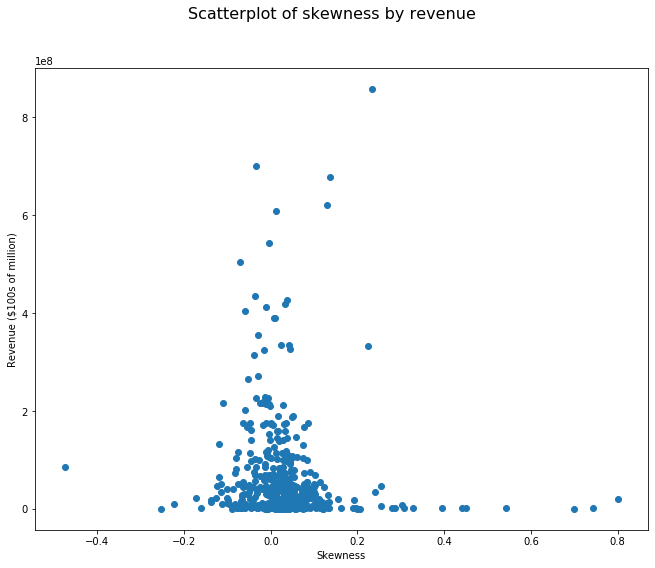

In [237]:
fig, ax = plt.subplots(figsize=(11,8.5))
fig.suptitle("Scatterplot of skewness by revenue", fontsize=16)
ax.set_xlabel("Skewness")
ax.set_ylabel("Revenue ($100s of million)")
scatter_plot = ax.scatter(x=result_df['skewness'], y=result_df['box_office'])
fig.savefig("scatter_skewness.png")

In [208]:
result_df.shape

(495, 28)

In [210]:
first_quart = skew_samples.iloc[0:123]
second_quart = skew_samples.iloc[124:247]
third_quart = skew_samples.iloc[248:371]
fourth_quart = skew_samples.iloc[372:495]
print(f"{len(first_quart)}, {len(second_quart)}, {len(third_quart)}, {len(fourth_quart)}")

123, 123, 123, 123


In [233]:
third_quart.describe()

count    123.000000
mean       0.006904
std        0.010817
min       -0.011554
25%       -0.002798
50%        0.006862
75%        0.015584
max        0.025755
Name: skewness, dtype: float64

In [211]:
stats.mannwhitneyu(first_quart, fourth_quart, alternative='two-sided')

MannwhitneyuResult(statistic=15129.0, pvalue=7.435819458342779e-42)

In [212]:
revenue_samples = result_df['box_office']
first_rev_quart = revenue_samples.iloc[0:123]
second_rev_quart = revenue_samples.iloc[124:247]
third_rev_quart = revenue_samples.iloc[248:371]
fourth_rev_quart = revenue_samples.iloc[372:495]
print(f"{len(first_rev_quart)}, {len(second_rev_quart)}, {len(third_rev_quart)}, {len(fourth_rev_quart)}")

123, 123, 123, 123


In [213]:
stats.mannwhitneyu(first_rev_quart, fourth_rev_quart, alternative='two-sided')

MannwhitneyuResult(statistic=5201.0, pvalue=2.2907450576707888e-05)

In [214]:
stats.ttest_ind(first_rev_quart, fourth_rev_quart)

Ttest_indResult(statistic=-2.477586443879812, pvalue=0.013905453533443125)

In [236]:
# first_rev_quart.describe()
from tabulate import tabulate
display(fourth_rev_quart.describe().apply(lambda x: format(x, ',.0f')))

count            123
mean      79,612,235
std      117,082,405
min           11,218
25%        8,226,919
50%       34,393,507
75%       89,059,348
max      700,059,566
Name: box_office, dtype: object

In [217]:
fourth_rev_quart.describe().apply(lambda x: format(x, ',.0f'))

count            123
mean      79,612,235
std      117,082,405
min           11,218
25%        8,226,919
50%       34,393,507
75%       89,059,348
max      700,059,566
Name: box_office, dtype: object

In [223]:
display(fourth_quart)

2     -0.012133
77    -0.012253
195   -0.013368
0     -0.013382
385   -0.013595
188   -0.013760
10    -0.014171
491   -0.014351
281   -0.014484
121   -0.014587
291   -0.015334
232   -0.016430
241   -0.016758
358   -0.018755
433   -0.019328
51    -0.019778
19    -0.019874
408   -0.019975
53    -0.021039
454   -0.024307
40    -0.024524
363   -0.025287
16    -0.025499
131   -0.026368
162   -0.026453
204   -0.027527
357   -0.028949
275   -0.029240
110   -0.030243
426   -0.030283
248   -0.031560
451   -0.032228
191   -0.033268
129   -0.033443
137   -0.033552
160   -0.034543
60    -0.034714
20    -0.034726
214   -0.036395
68    -0.036432
81    -0.037349
109   -0.037352
116   -0.037456
64    -0.038199
419   -0.038256
141   -0.038297
274   -0.040778
398   -0.040853
98    -0.042033
150   -0.042125
54    -0.043344
164   -0.043832
1     -0.044657
97    -0.044967
382   -0.044997
270   -0.045029
308   -0.045363
170   -0.047085
186   -0.047542
222   -0.047621
350   -0.048120
461   -0.048763
369   -0

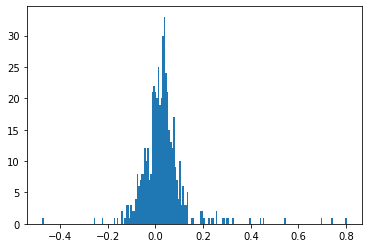

In [32]:
#plt.hist(x=result_df['skewness'], weights=result_df['binned'])
histogram = plt.hist(x=result_df['skewness'], bins=200)

In [189]:
first_rev_quart[0:10]

495    19005109.0
493     1101470.0
497      607015.0
268     1687000.0
498     1294596.0
487      930554.0
480     1807216.0
348     2587072.0
371      800148.0
320     7233471.0
Name: box_office, dtype: float64

In [33]:
result_df['skewness'].describe()

count    499.000000
mean       0.030218
std        0.099739
min       -0.475627
25%       -0.011252
50%        0.025756
75%        0.056624
max        0.801901
Name: skewness, dtype: float64

In [39]:
result_df[result_df['skewness'] > 0.1].count()   # 145 for > 0.05, 18 for 0.2, 52 for 0.1
skew_sample = result_df[result_df['skewness'] > 0.1]['skewness']
skew_sample.describe()

count    52.000000
mean      0.218395
std       0.167318
min       0.102109
25%       0.113778
50%       0.133572
75%       0.253697
max       0.801901
Name: skewness, dtype: float64

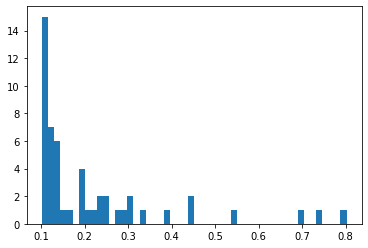

In [40]:
histogram = plt.hist(skew_sample, bins=50)

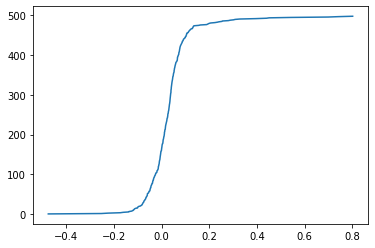

In [56]:
# result_df['skewness'].sort_values().plot(use_index=False)
plt.plot(result_df['skewness'].sort_values(), range(len(result_df['skewness'])))
# Do the same for the normal distribution

In [60]:
# result_df['skewness'].sort_values()

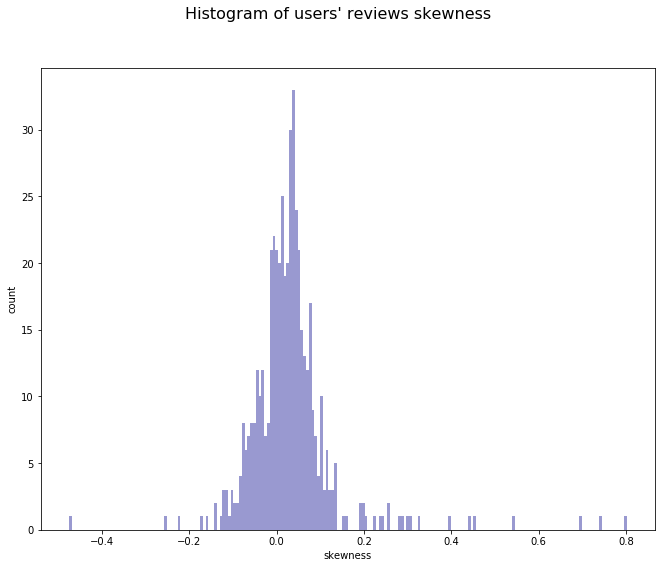

In [162]:
fig, ax = plt.subplots(figsize=(11,8.5))
fig.suptitle("Histogram of users' reviews skewness", fontsize=16)
ax.set_ylabel("count")
# Prints probability density curve over histogram
svm = sns.distplot(result_df['skewness'], ax=ax, hist=True, kde=False, 
             bins=200, color = 'darkblue', 
             
             kde_kws={'linewidth': 2})
#fig = svm.get_figure()
fig.savefig('skewness-pdf.png', dpi=200)
# hist_kws={'edgecolor':'black'},

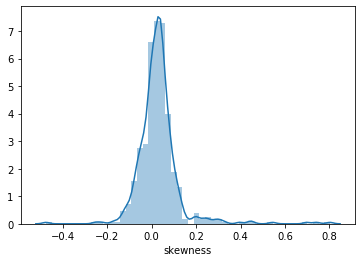

In [59]:
sns.distplot(result_df['skewness'])

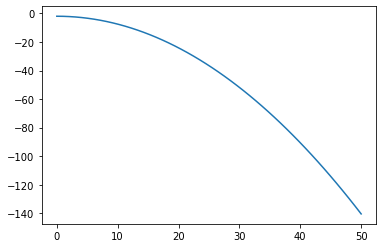

In [23]:
%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot

# a = array([10,11,9,23,21,11,45,20,11,12]).reshape(-1, 1)
a = result_df['skewness'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [27]:
from scipy.signal import argrelextrema
import numpy as np
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])


Minima: []
Maxima: []


In [14]:
result_df['skewness'].values


array([-1.33821595e-02, -4.46574818e-02, -1.21334253e-02,  3.78613968e-02,
        5.81169559e-02, -6.37888185e-03,  1.20265463e-02,  7.54056417e-02,
        3.61421676e-02,  4.17967271e-02, -1.41709419e-02,  5.03685553e-02,
        8.03710910e-02, -3.20191335e-04,  4.61739234e-02,  1.00627175e-03,
       -2.54985168e-02,  2.90630064e-03,  4.07336172e-02, -1.98741180e-02,
       -3.47257298e-02,  7.42206194e-02, -6.32807117e-02, -1.15543463e-02,
        6.92100339e-02,  5.97499817e-02,  4.18867390e-02,  1.12171461e-01,
        3.59187372e-02,  5.93420833e-02,  4.32541492e-02,  2.12361310e-02,
        4.47003119e-02,  4.52997552e-02,  2.95754714e-02,  2.46072634e-02,
       -6.68192156e-02, -6.49791318e-02,  9.32885310e-02,  3.20176288e-02,
       -2.45238290e-02, -8.27158172e-02,  1.88142190e-02,  3.63904039e-02,
       -2.66530128e-03, -1.14584546e-01,  8.40874471e-02,  3.47612639e-02,
        3.73362699e-02,  3.75175298e-02,  1.91199961e-02, -1.97777716e-02,
        3.94980194e-02, -

In [35]:
skewed_df


,Unnamed: 0,Unnamed: 0.1,movie_id,one,two,three,four,five,six,seven,eight,nine,ten,lower,median,upper,skewness,binned
0,0,0,tt4154796,16945,2904,3735,5358,12218,26796,61570,106585,128868,252166,7.732305,9.062292,9.888156,0.233840,0.3
1,1,1,tt1825683,18526,5649,7318,12276,27698,64123,130975,134420,70373,83181,6.523247,7.579635,8.712002,-0.034714,0.0
2,2,2,tt4154756,12153,2582,3175,4850,10902,27929,73632,147024,184184,264054,7.822384,8.950612,9.808394,0.136175,0.1
3,3,3,tt2527336,33403,11729,14071,17992,31278,57418,99731,103284,62544,57001,5.737552,7.285458,8.475139,0.130854,0.1
4,4,4,tt3606756,1428,631,937,2194,6540,20064,55352,70904,35749,26904,6.922419,7.827281,8.709160,0.012863,0.0
5,5,5,tt6105098,4946,1906,2591,4152,9542,20843,37913,30384,14490,18418,6.131351,7.254688,8.388486,-0.004634,0.0
6,6,6,tt2771200,5012,2097,3270,6009,14028,34104,63826,55910,28259,37000,6.437214,7.443777,8.601923,-0.070025,-0.1
7,7,7,tt1979376,1201,393,538,1243,3142,9521,27222,43671,28153,21425,7.164508,8.072336,9.048814,-0.036432,0.0
8,8,8,tt4154664,25296,5468,6439,10373,22322,54507,101814,79179,32603,42259,5.961721,7.145540,8.244844,0.037017,0.0
9,9,9,tt4881806,5085,4346,7858,14232,31233,60129,60304,28480,9582,13361,5.368681,6.407233,7.380116,0.032648,0.0
